In [96]:
# import standard numerical modules
import numpy as np
import math
import tensorflow as tf
import sys


data_dir='../Data'

path_to_DCTR = '../20240503/' # modify as needed
sys.path.append(path_to_DCTR)
import DCTR


In [126]:
from importlib import reload
reload(DCTR)


<module 'DCTR' from '/home/finn/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/shower/../20240503/DCTR.py'>

# hvq

In [107]:
#hvq after shower (after pythia)
X0_plt_tt = []
X0_plt_tt = DCTR.load_dataset('./ShowerTT.npz')[:1005000] # 9553938 num of MiNNLO samples
print('POWHEG hvq X0_plt_tt.shape: '+str(X0_plt.shape))

#hvq after shower (after pythia)
X0_plt_top = []
X0_plt_top = DCTR.load_dataset('./ShowerTop.npz')[:1005000] # 9553938 num of MiNNLO samples
print('POWHEG hvq X0_plt_top.shape: '+str(X0_plt_top.shape))

# remove events that had problems converting
bad_events = [4372, 7200, 14147, 14831, 17860, 21591, 21718, 22081, 31883, 35187, 60318, 65210, 65868, 76793, 104535, 106652, 112703, 117103, 123632, 130040, 135356, 140697, 141131, 154570, 157085, 168002, 176404, 204470, 212537, 215451, 227625, 237455, 270477, 291498, 300278, 316122, 318739, 326817, 331975, 352310, 352981, 354016, 356597, 357558, 358409, 371632, 371786, 374558, 379056, 379293, 383840, 395421, 408482, 418043, 419254, 425650, 441152, 441894, 446073, 448635, 461462, 468161, 470330, 484997, 490867, 503272, 508953, 519954, 554232, 558764, 563152, 586755, 587738, 641177, 644991, 646025, 646287, 647630, 657682, 659122, 661422, 675402, 677597, 678277, 682885, 690620, 690777, 707866, 708790, 712430, 716492, 722763, 723290, 727953, 728430, 734864, 769573, 787898, 805264, 807191, 824857, 832947, 847259, 867196, 895538, 895644, 904054, 906380, 909954, 936327, 958977, 962144, 969617, 986329, 997498]


# If the value is not in BadEvents, remove the event from filtered_X0_test
filtered_X0_plt_tt = np.delete(X0_plt_tt, bad_events, axis=0)
print('POWHEG hvq filtered_X0_plt_tt.shape: '+str(filtered_X0_plt_tt.shape))

# If the value is not in BadEvents, remove the event from filtered_X0_test
filtered_X0_plt_top = np.delete(X0_plt_top, bad_events, axis=0)
print('POWHEG hvq filtered_X0_plt_top.shape: '+str(filtered_X0_plt_top.shape))

length = len(filtered_X0_plt_tt)

print(length)


POWHEG hvq X0_plt_tt.shape: (1000000, 1, 6)
POWHEG hvq X0_plt_top.shape: (1000000, 2, 6)
POWHEG hvq filtered_X0_plt_tt.shape: (999885, 1, 6)
POWHEG hvq filtered_X0_plt_top.shape: (999885, 2, 6)
999885


In [108]:
# fix off by one error for bad_events
bad_events = np.array(bad_events) - 1

print(bad_events)


[  4371   7199  14146  14830  17859  21590  21717  22080  31882  35186
  60317  65209  65867  76792 104534 106651 112702 117102 123631 130039
 135355 140696 141130 154569 157084 168001 176403 204469 212536 215450
 227624 237454 270476 291497 300277 316121 318738 326816 331974 352309
 352980 354015 356596 357557 358408 371631 371785 374557 379055 379292
 383839 395420 408481 418042 419253 425649 441151 441893 446072 448634
 461461 468160 470329 484996 490866 503271 508952 519953 554231 558763
 563151 586754 587737 641176 644990 646024 646286 647629 657681 659121
 661421 675401 677596 678276 682884 690619 690776 707865 708789 712429
 716491 722762 723289 727952 728429 734863 769572 787897 805263 807190
 824856 832946 847258 867195 895537 895643 904053 906379 909953 936326
 958976 962143 969616 986328 997497]


In [109]:
filtered_X0_plt_full = np.concatenate((filtered_X0_plt_tt, filtered_X0_plt_top), axis=1)
print('POWHEG hvq filtered_X0_plt_full.shape: '+str(filtered_X0_plt_full.shape))


POWHEG hvq filtered_X0_plt_full.shape: (999885, 3, 6)


In [110]:
#hvq before shower (LHE)
X0_test = []
X0_test = DCTR.load_dataset('./seed100_converted_lhe_new_shower.npz')[:length]
print('POWHEG hvq X0_test.shape: '+str(X0_test.shape))


X0_test_nrm = []
X0_test_nrm = DCTR.load_dataset('./seed100_converted_lhe_new_shower_normed.npz')[:length]
print('POWHEG hvq X0_test_nrm.shape: '+str(X0_test_nrm.shape))



POWHEG hvq X0_test.shape: (999885, 3, 9)
POWHEG hvq X0_test_nrm.shape: (100087, 3, 9)


In [111]:
# get event generator weights
X0_test_wgt = X0_test[:, 0, 7].copy()

print(len(X0_test_wgt))

999885


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


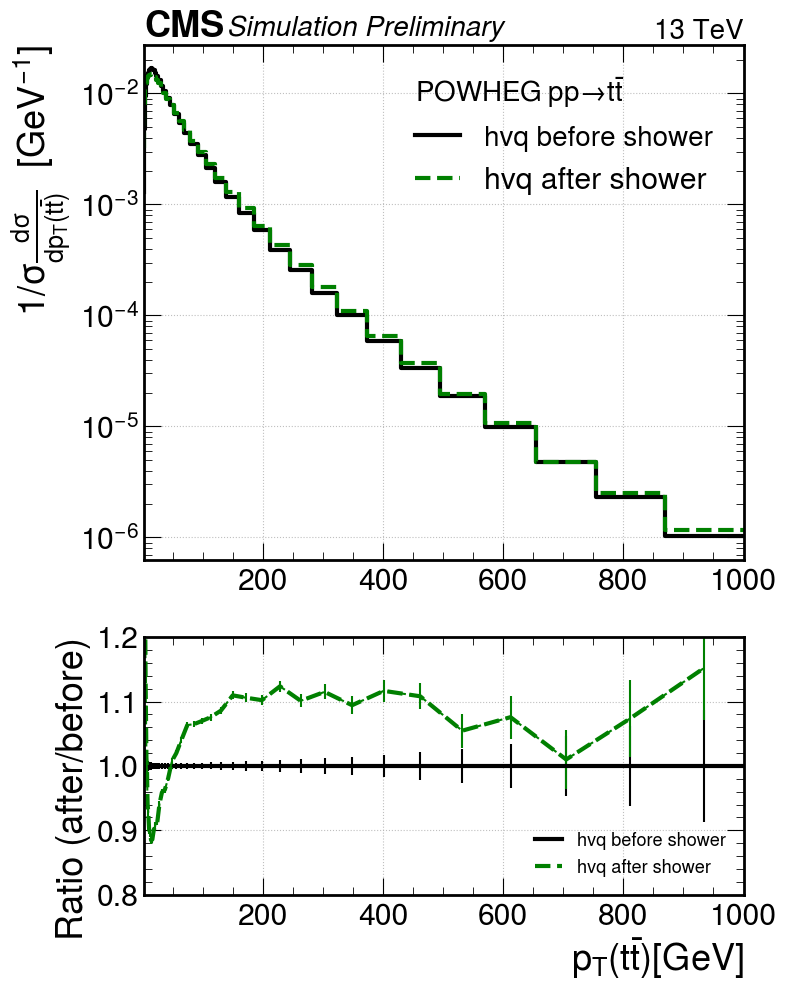

In [112]:
# setup args for plotting
args = [(X0_test, X0_test_wgt, 'hvq before shower'),
        (filtered_X0_plt_full, X0_test_wgt, 'hvq after shower')]


arg_indices = [0, 3, 4, 5]
part_indices = [0, 1]

## pt(ttbar)
log_bins = np.logspace(np.log10(1), np.log10(1e3), 50)
DCTR.plot_ratio_cms_2(args, arg_index=0, part_index=0, ratio_ylim=[0.8,1.2], bins=log_bins, y_scale='log') # , ratio_ylim=[0.8, 1.2])
## m(ttbar)
## pT(top)


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


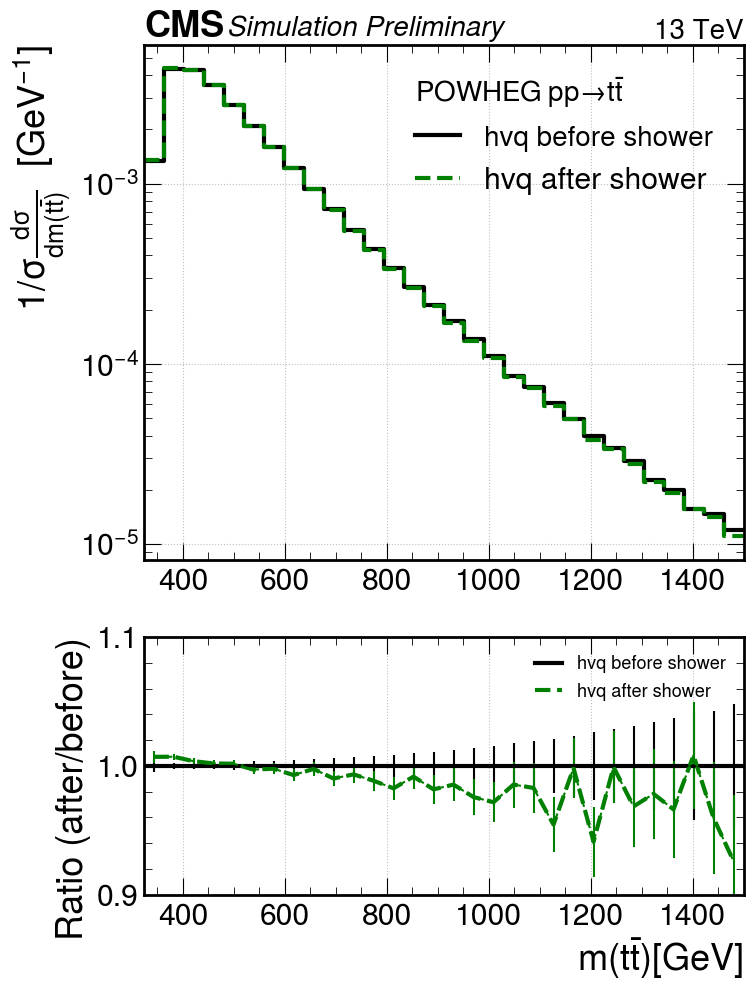

In [103]:
# setup args for plotting mass, since they are at different indices before and after showering
# before: 3 | after 4
filtered_X0_plt_no_eta = np.delete(filtered_X0_plt, 2, axis=-1)

# setup args for plotting
args_m = [(X0_test, X0_test_wgt, 'hvq before shower'), 
          (filtered_X0_plt_no_eta, X0_test_wgt, 'hvq after shower')]

# m(tt) min(X1[:,])
min_m_tt = min(filtered_X0_plt[:,0,4])

lin_bins = np.linspace(322.9727283915917, 1500, 31) 
DCTR.plot_ratio_cms_2(args_m, arg_index=3, part_index=0, bins=lin_bins, 
                    y_scale='log', ratio_ylim=[0.90, 1.10], save_prefix = 'mean_lin_min-1500_31')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


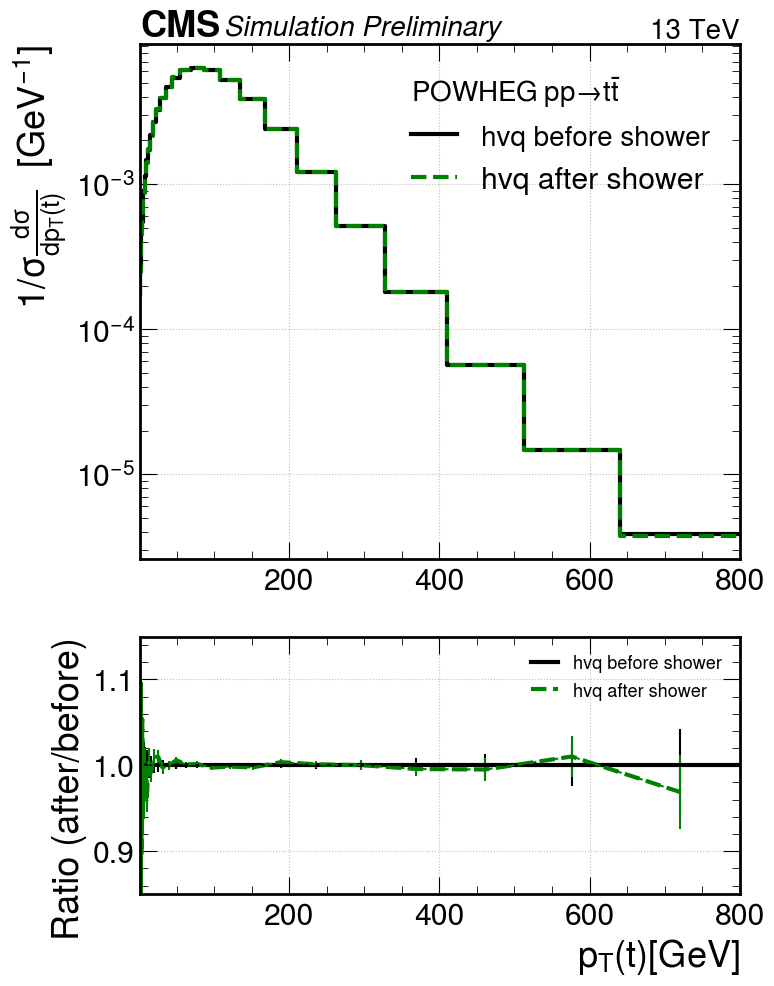

In [104]:
# p_t(t) log binning
log_bins = np.logspace(np.log10(1), np.log10(800), 31)
DCTR.plot_ratio_cms_2(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.85, 1.15], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_log_0800_31')


# reweighted hvq->MiNNLO


In [114]:
##### From here normalisation, for NN weigths
X0_norm = DCTR.load_dataset('./seed100_converted_lhe_new_shower_normed.npz')[:length] # 9553938 num of MiNNLO samples
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_norm = np.delete(X0_norm, 5, -1)
# delete eta
X0_norm = np.delete(X0_norm, 4, -1)
print('POWHEG hvq X0_norm.shape: '+str(X0_norm.shape))


model = '../20240503/20240504_training/train_20240504/super_epoch_18/run_4/s-18_b-131072_r-4.tf'
dctr = tf.keras.models.load_model(model)

# calculate rwgt
with tf.device('CPU'):
    rwgt = DCTR.get_rwgt([model], X0_norm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook
rwgt = np.multiply(rwgt[0], X0_plt_wgt) # mult with event gen wgt


POWHEG hvq X0_norm.shape: (999885, 3, 7)


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


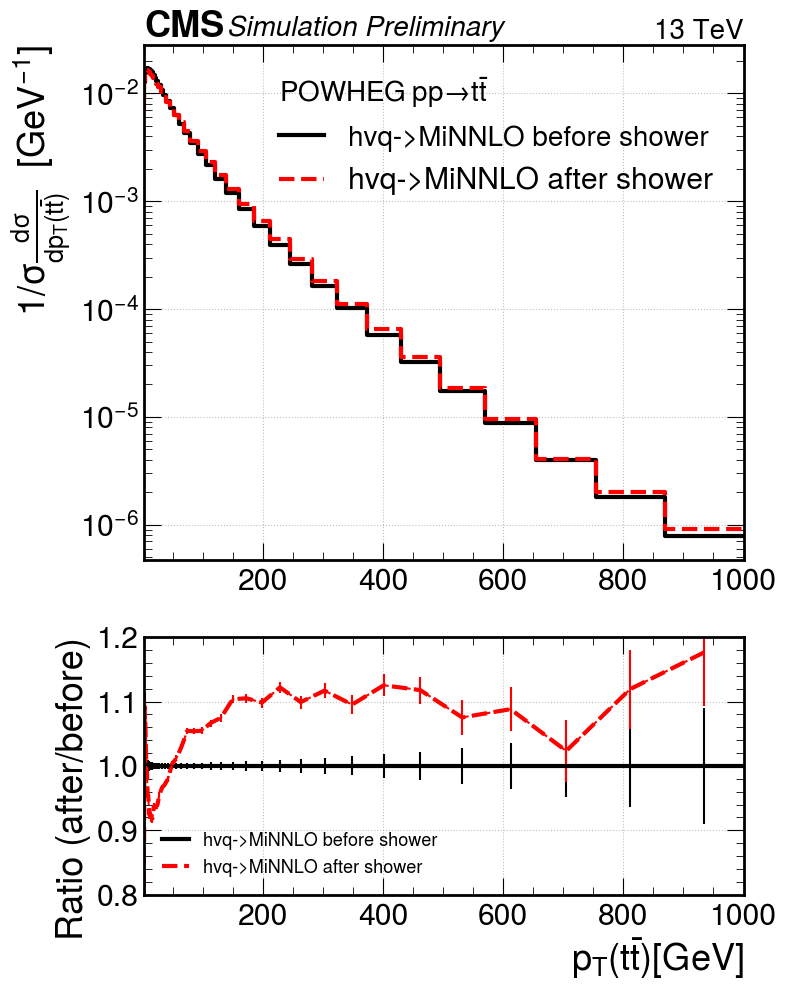

In [127]:
# setup args for plotting
args = [(X0_test, rwgt, 'hvq->MiNNLO before shower'),
        (filtered_X0_plt_full, rwgt, 'hvq->MiNNLO after shower')]


arg_indices = [0, 3, 4, 5]
part_indices = [0, 1]

## pt(ttbar)
log_bins = np.logspace(np.log10(1), np.log10(1e3), 50)
DCTR.plot_ratio_cms_2(args, arg_index=0, part_index=0, ratio_ylim=[0.8,1.2], bins=log_bins, y_scale='log', color = 'red') # , ratio_ylim=[0.8, 1.2])
## m(ttbar)
## pT(top)


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


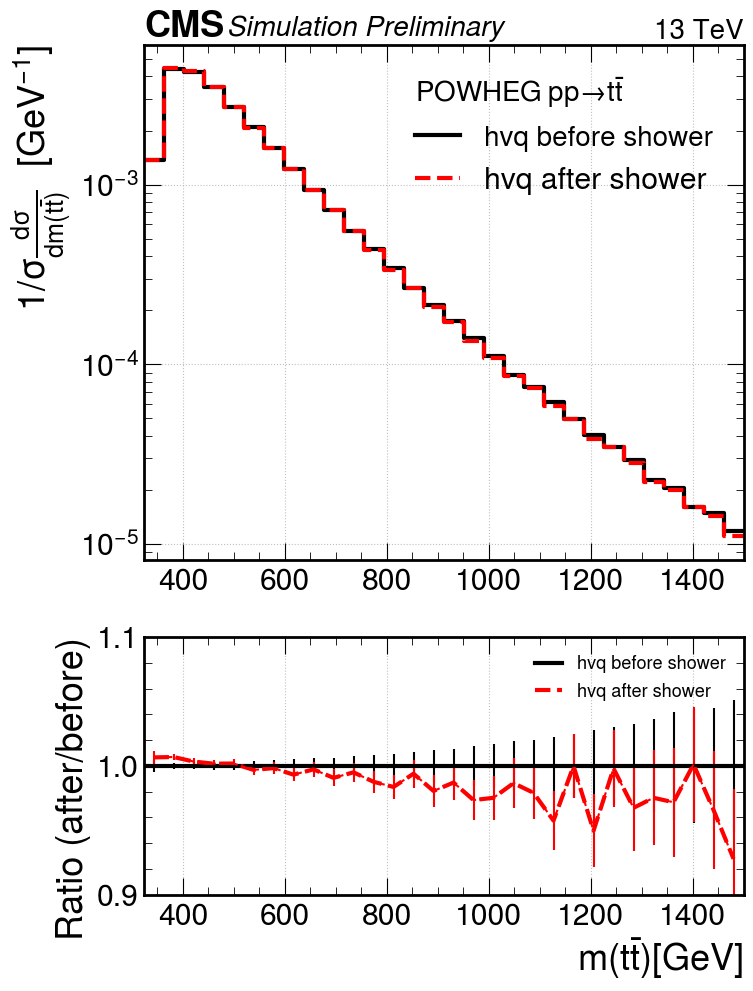

In [128]:
# setup args for plotting mass, since they are at different indices before and after showering
# before: 3 | after 4
filtered_X0_plt_no_eta = np.delete(filtered_X0_plt, 2, axis=-1)

# setup args for plotting
args_m = [(X0_test, rwgt, 'hvq before shower'), 
          (filtered_X0_plt_no_eta, rwgt, 'hvq after shower')]

# m(tt) min(X1[:,])
min_m_tt = min(filtered_X0_plt[:,0,4])

lin_bins = np.linspace(322.9727283915917, 1500, 31) 
DCTR.plot_ratio_cms_2(args_m, arg_index=3, part_index=0, bins=lin_bins, color='red', 
                    y_scale='log', ratio_ylim=[0.90, 1.10], save_prefix = 'mean_lin_min-1500_31')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


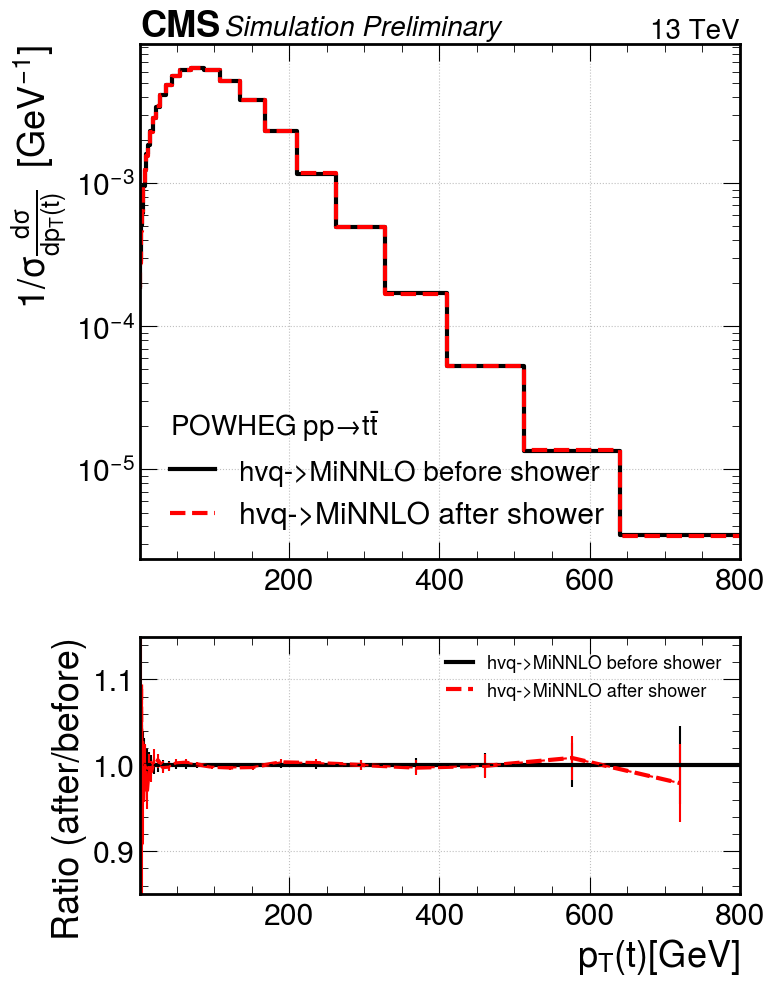

In [129]:
# p_t(t) log binning
log_bins = np.logspace(np.log10(1), np.log10(800), 31)
DCTR.plot_ratio_cms_2(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.85, 1.15], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_log_0800_31', color='red')
